In [1]:
from google.colab import files
uploaded = files.upload()


Saving hospital_readmissions_30k.csv to hospital_readmissions_30k.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('hospital_readmissions_30k.csv')
df.head()


,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


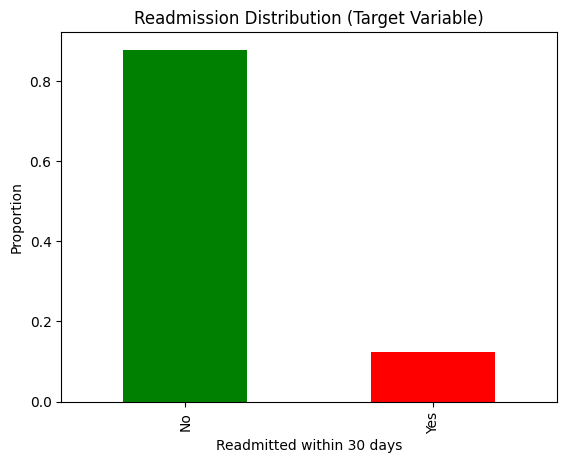

In [3]:
# Check distribution of readmissions
df['readmitted_30_days'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Readmission Distribution (Target Variable)')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Proportion')
plt.show()


In [4]:
# Check for missing values
df.isnull().sum()


,0
patient_id,0
age,0
gender,0
blood_pressure,0
cholesterol,0
bmi,0
diabetes,0
hypertension,0
medication_count,0
length_of_stay,0


In [5]:
binary_cols = ['diabetes', 'hypertension', 'readmitted_30_days']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [6]:
# Split blood pressure into two new columns
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(float)

# Drop the original column
df.drop('blood_pressure', axis=1, inplace=True)


In [7]:
# Identify categorical columns
categorical_cols = ['gender', 'discharge_destination']

# Use one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [8]:
df.info()  # Should now show all numerical features
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   patient_id                              30000 non-null  int64  
 1   age                                     30000 non-null  int64  
 2   cholesterol                             30000 non-null  int64  
 3   bmi                                     30000 non-null  float64
 4   diabetes                                30000 non-null  int64  
 5   hypertension                            30000 non-null  int64  
 6   medication_count                        30000 non-null  int64  
 7   length_of_stay                          30000 non-null  int64  
 8   readmitted_30_days                      30000 non-null  int64  
 9   systolic_bp                             30000 non-null  float64
 10  diastolic_bp                            30000 non-null  fl

,patient_id,age,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,readmitted_30_days,systolic_bp,diastolic_bp,gender_Male,gender_Other,discharge_destination_Nursing_Facility,discharge_destination_Rehab
0,1,74,240,31.5,1,0,5,1,1,130.0,72.0,False,True,True,False
1,2,46,292,36.3,0,0,4,3,0,120.0,92.0,False,False,True,False
2,3,89,153,30.3,0,1,1,1,0,135.0,78.0,False,True,False,False
3,4,84,153,31.5,0,1,3,10,0,123.0,80.0,False,False,False,False
4,5,32,205,18.4,0,1,6,4,0,135.0,84.0,False,True,True,False


/tmp/ipython-input-9-2175106047.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted_30_days', data=df, palette='Set2')


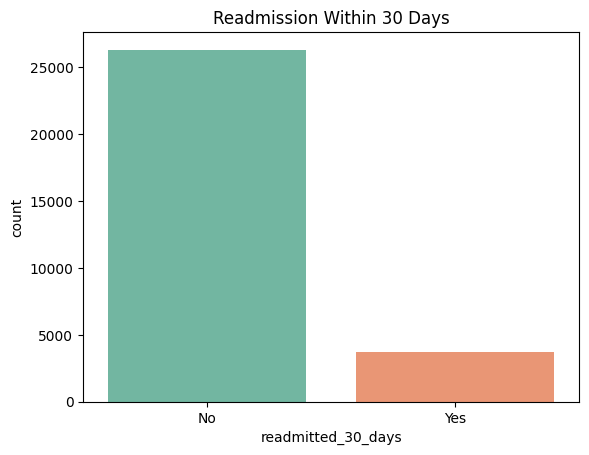

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target distribution
sns.countplot(x='readmitted_30_days', data=df, palette='Set2')
plt.title('Readmission Within 30 Days')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


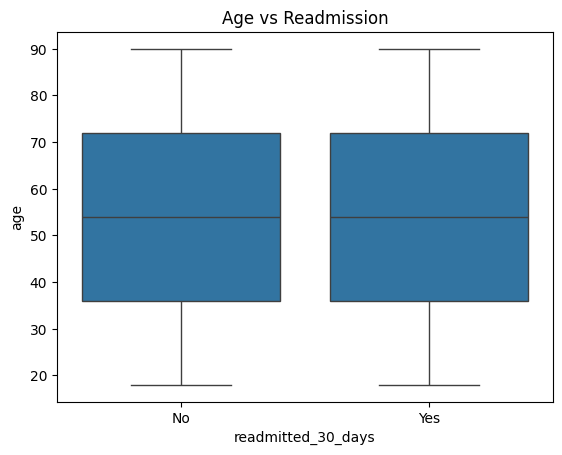

In [10]:
sns.boxplot(x='readmitted_30_days', y='age', data=df)
plt.title('Age vs Readmission')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


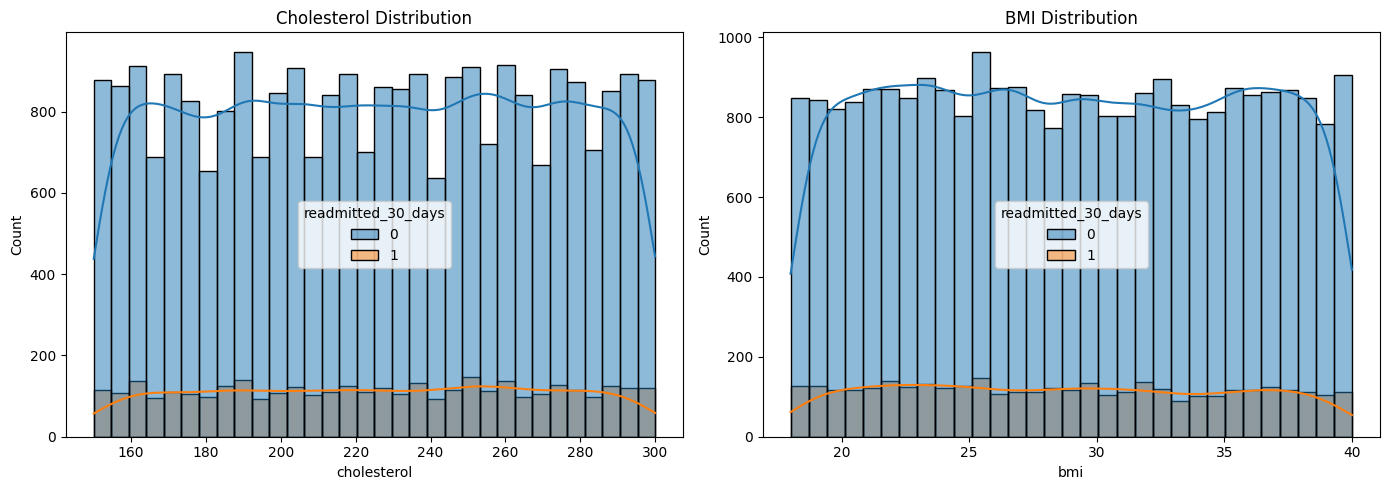

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x='cholesterol', hue='readmitted_30_days', kde=True, ax=axes[0])
axes[0].set_title('Cholesterol Distribution')

sns.histplot(data=df, x='bmi', hue='readmitted_30_days', kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')

plt.tight_layout()
plt.show()


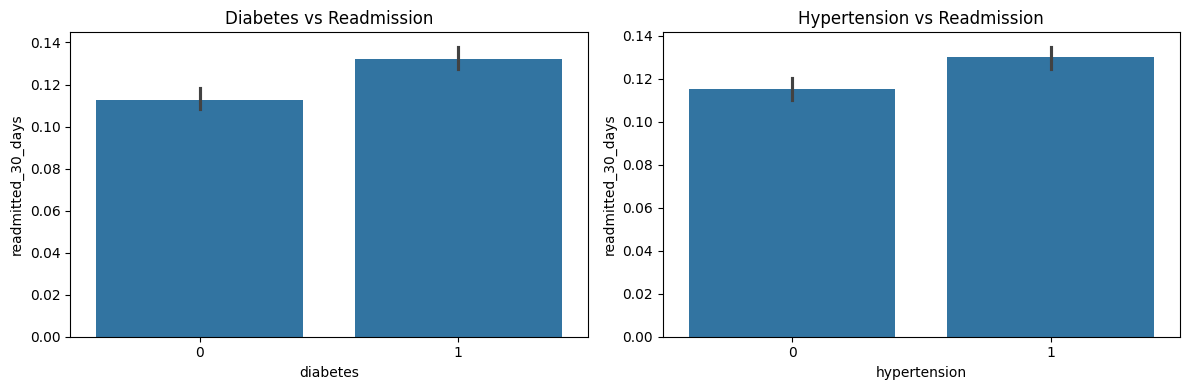

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(x='diabetes', y='readmitted_30_days', data=df, ax=axes[0])
axes[0].set_title('Diabetes vs Readmission')

sns.barplot(x='hypertension', y='readmitted_30_days', data=df, ax=axes[1])
axes[1].set_title('Hypertension vs Readmission')

plt.tight_layout()
plt.show()


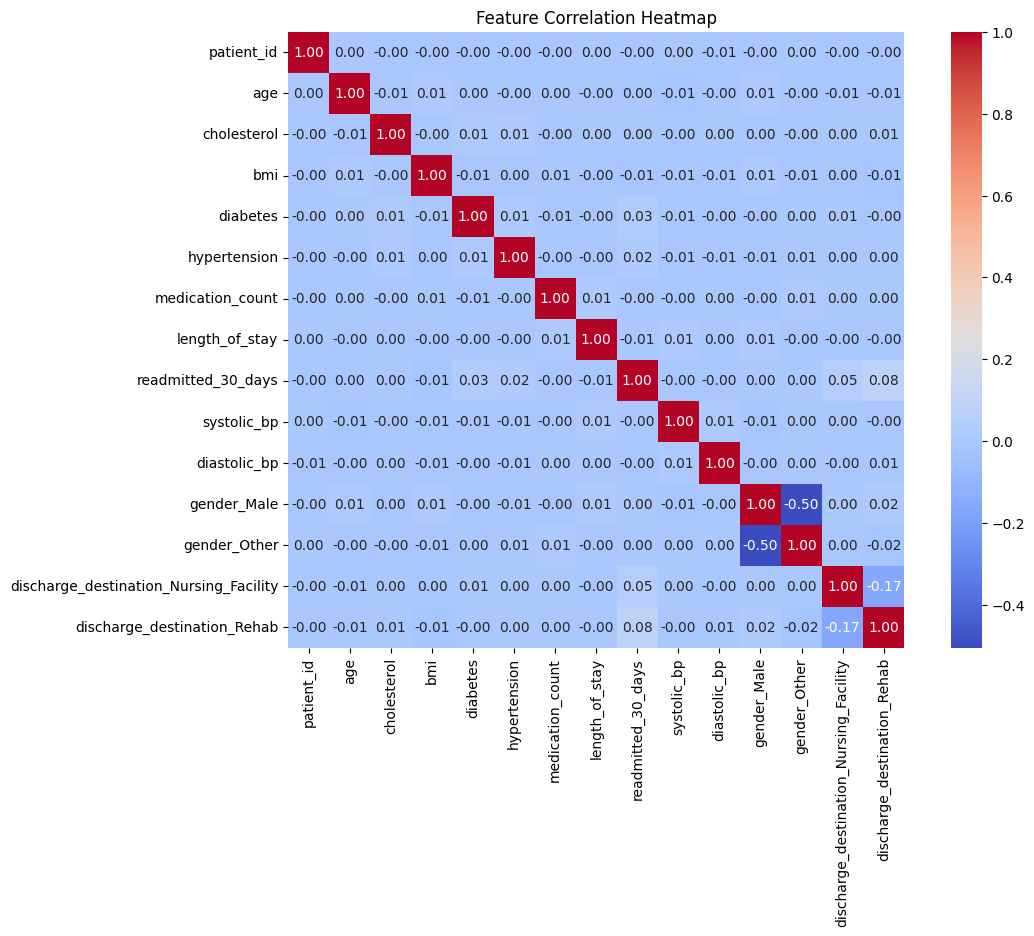

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()


In [14]:
# Separate features and target
X = df.drop(['patient_id', 'readmitted_30_days'], axis=1)
y = df['readmitted_30_days']

# Train/Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


🔍 Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5265
           1       0.00      0.00      0.00       735

    accuracy                           0.88      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.77      0.88      0.82      6000

ROC AUC: 0.5638482857530476


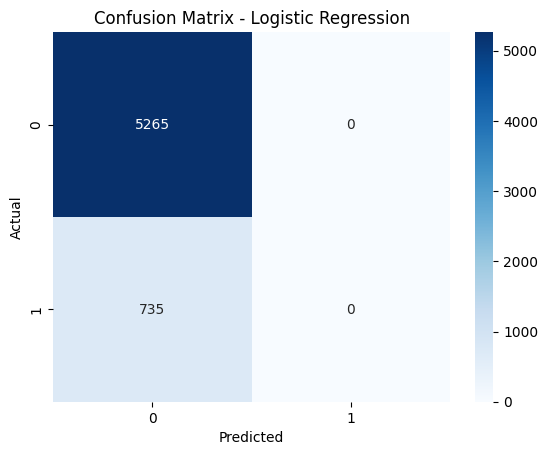

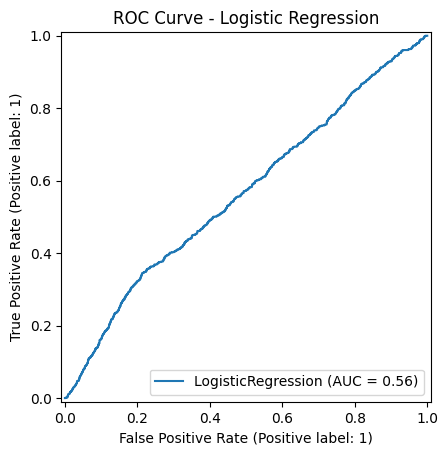

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("🔍 Logistic Regression Evaluation:\n")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


🌲 Random Forest Evaluation:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5265
           1       0.00      0.00      0.00       735

    accuracy                           0.88      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.77      0.88      0.82      6000

ROC AUC: 0.5438942832593626


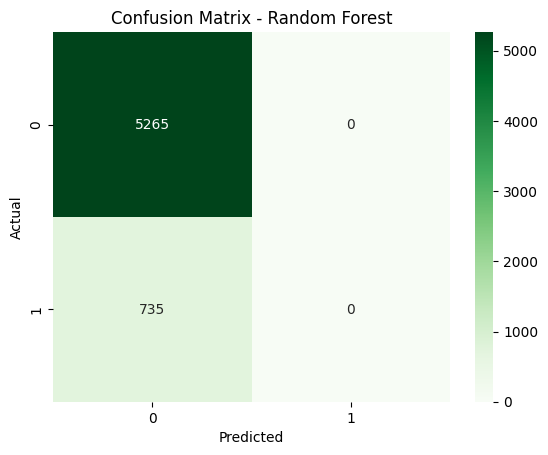

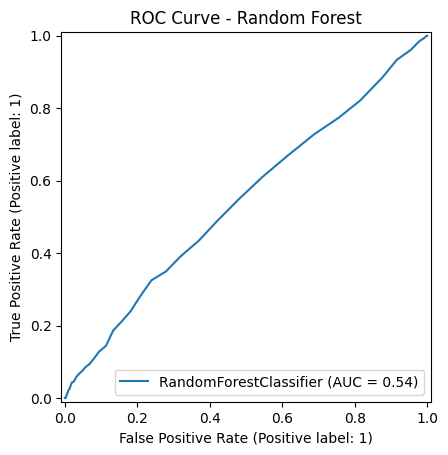

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("🌲 Random Forest Evaluation:\n")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


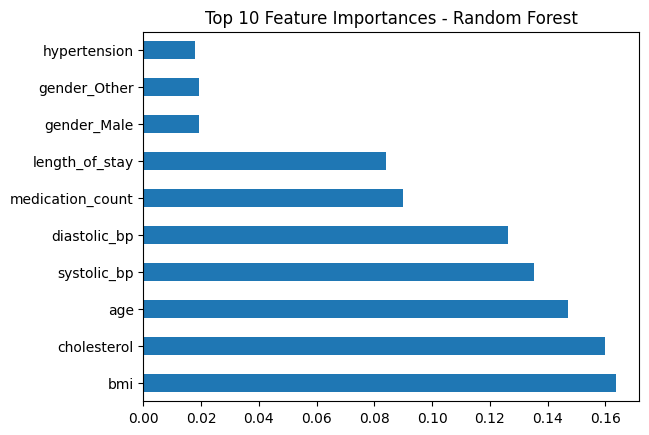

In [17]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()
